In [1]:
%matplotlib widget
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters

from statsmodels.tsa.seasonal import STL

import glob
import numpy as np

register_matplotlib_converters()
sns.set_style("darkgrid")

In [2]:
plt.rc("figure", figsize=(16, 12))
plt.rc("font", size=13)

In [3]:
files = sorted(glob.glob("data/*_F732C_M69.xlsx"))

In [4]:
times  = []
values = []
stds   = []
temperature = []

for filename in files[250:]:
    print(filename, end = "\r")
    data = pd.read_excel(filename)
    
    times.append(np.mean(data["timestamp"]))
    values.append(np.mean(data["diff"]*1e6))
    stds.append( 2 * np.std(data["diff"]*1e6)/len(data["diff"])**0.5  )
    #stds.append( np.std(data["diff"]*1e6) )
    temperature.append(np.mean(data["temp"]))

values = np.array(values)

In [5]:
ds = pd.Series(
    values, index=times, name="M69"
)

In [6]:
ds.describe()

count    619.000000
mean      26.348228
std        0.635836
min       24.378817
25%       25.917674
50%       26.383092
75%       26.796286
max       28.159808
Name: M69, dtype: float64

In [7]:
ds

2022-03-03 02:12:36.247500032    26.428819
2022-03-03 02:13:35.946124800    26.393362
2022-03-03 02:14:35.953750016    26.372119
2022-03-03 02:15:36.276124928    26.415425
2022-03-03 02:16:36.281750016    26.465944
                                   ...    
2024-11-14 04:10:51.020264960    25.482939
2024-11-15 04:10:51.505850112    24.938690
2024-11-16 04:10:50.655109632    25.968847
2024-11-17 04:10:51.089600256    26.157418
2024-11-18 04:10:51.915885312    25.980265
Name: M69, Length: 619, dtype: float64

In [8]:
data = ds.resample('W').mean().ffill()

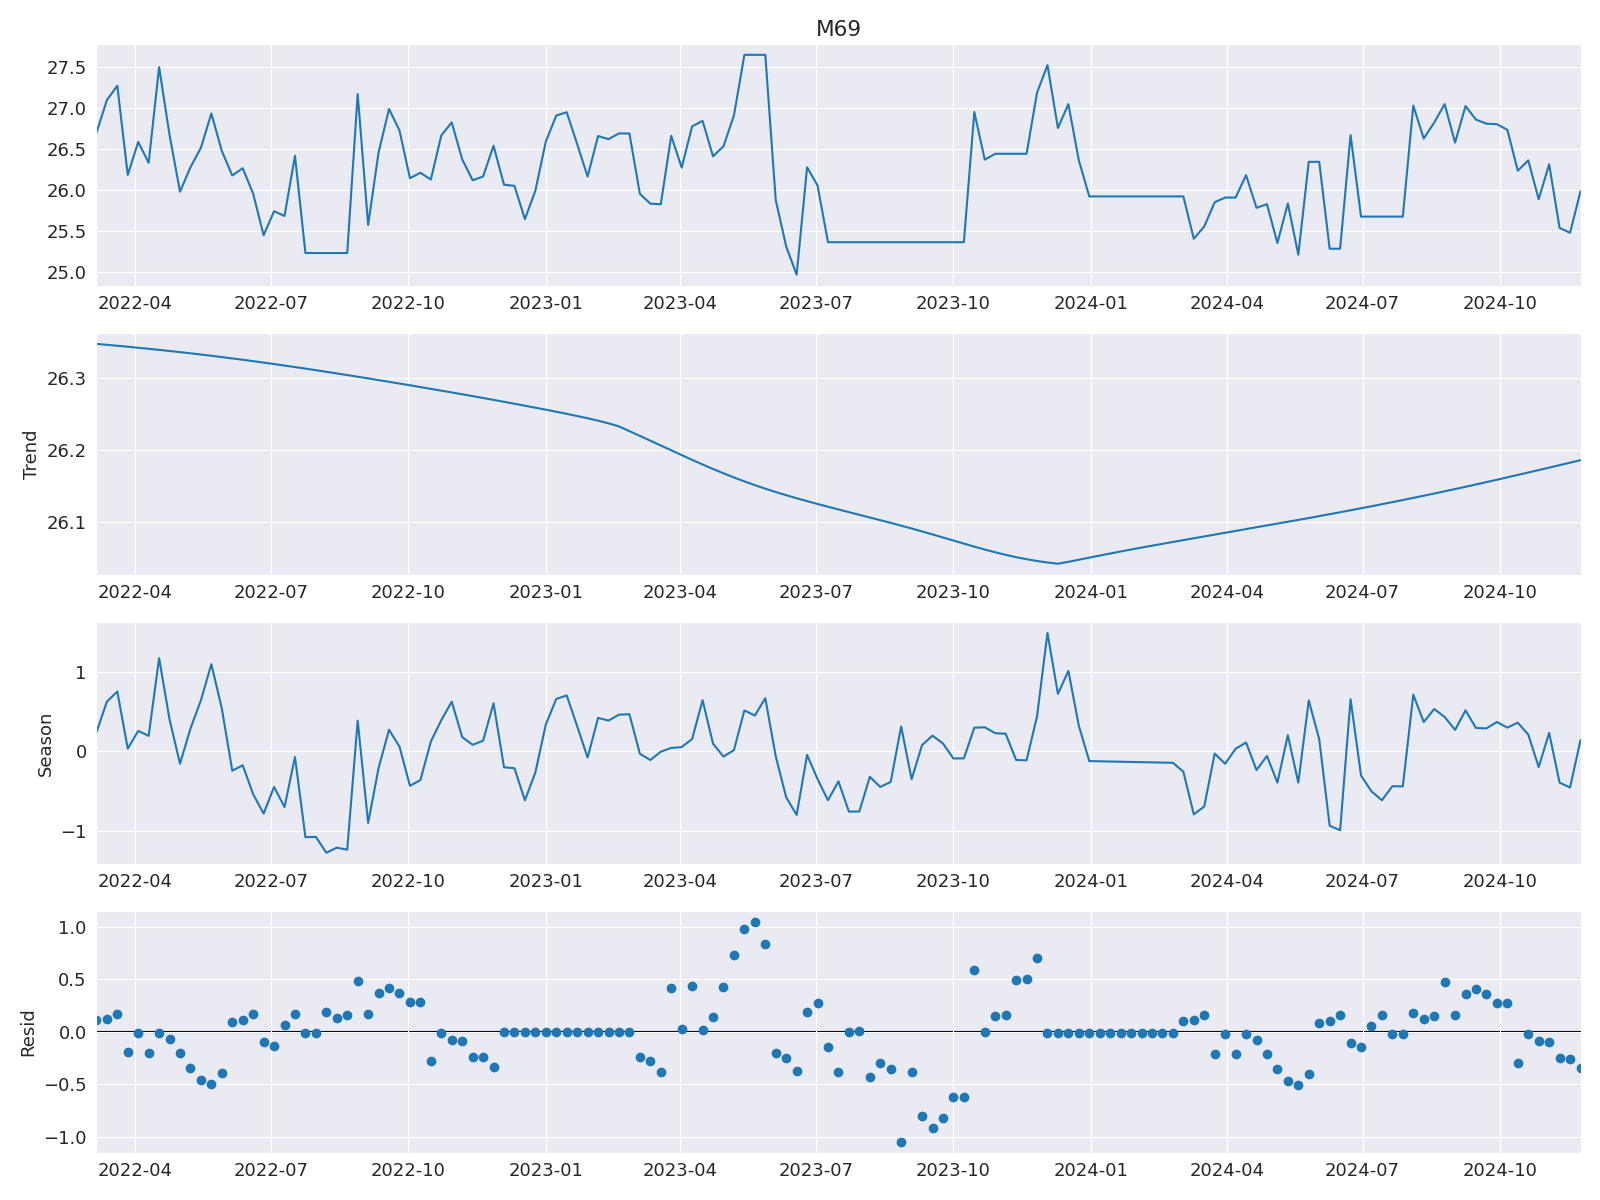

In [9]:
res = STL(data, period=None).fit()
res.plot()
plt.show()

In [10]:
res

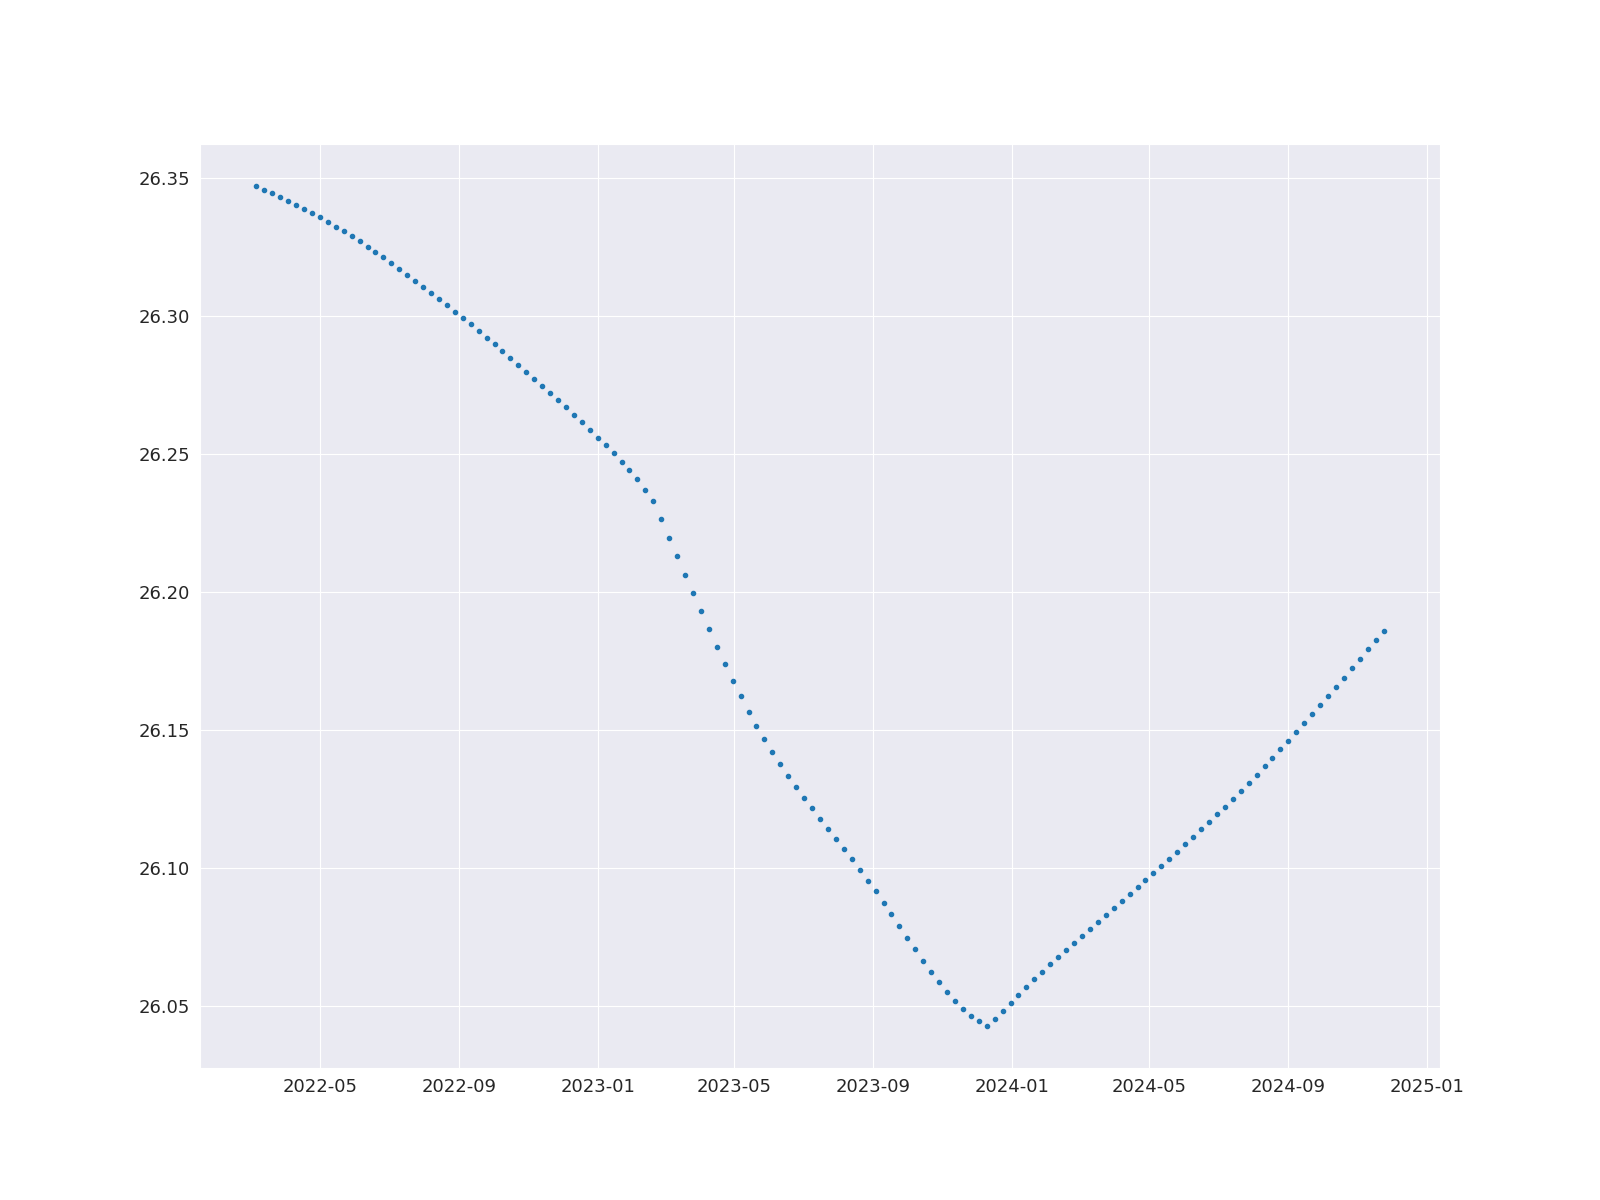

In [11]:
plt.figure()
plt.plot(res.trend, '.')


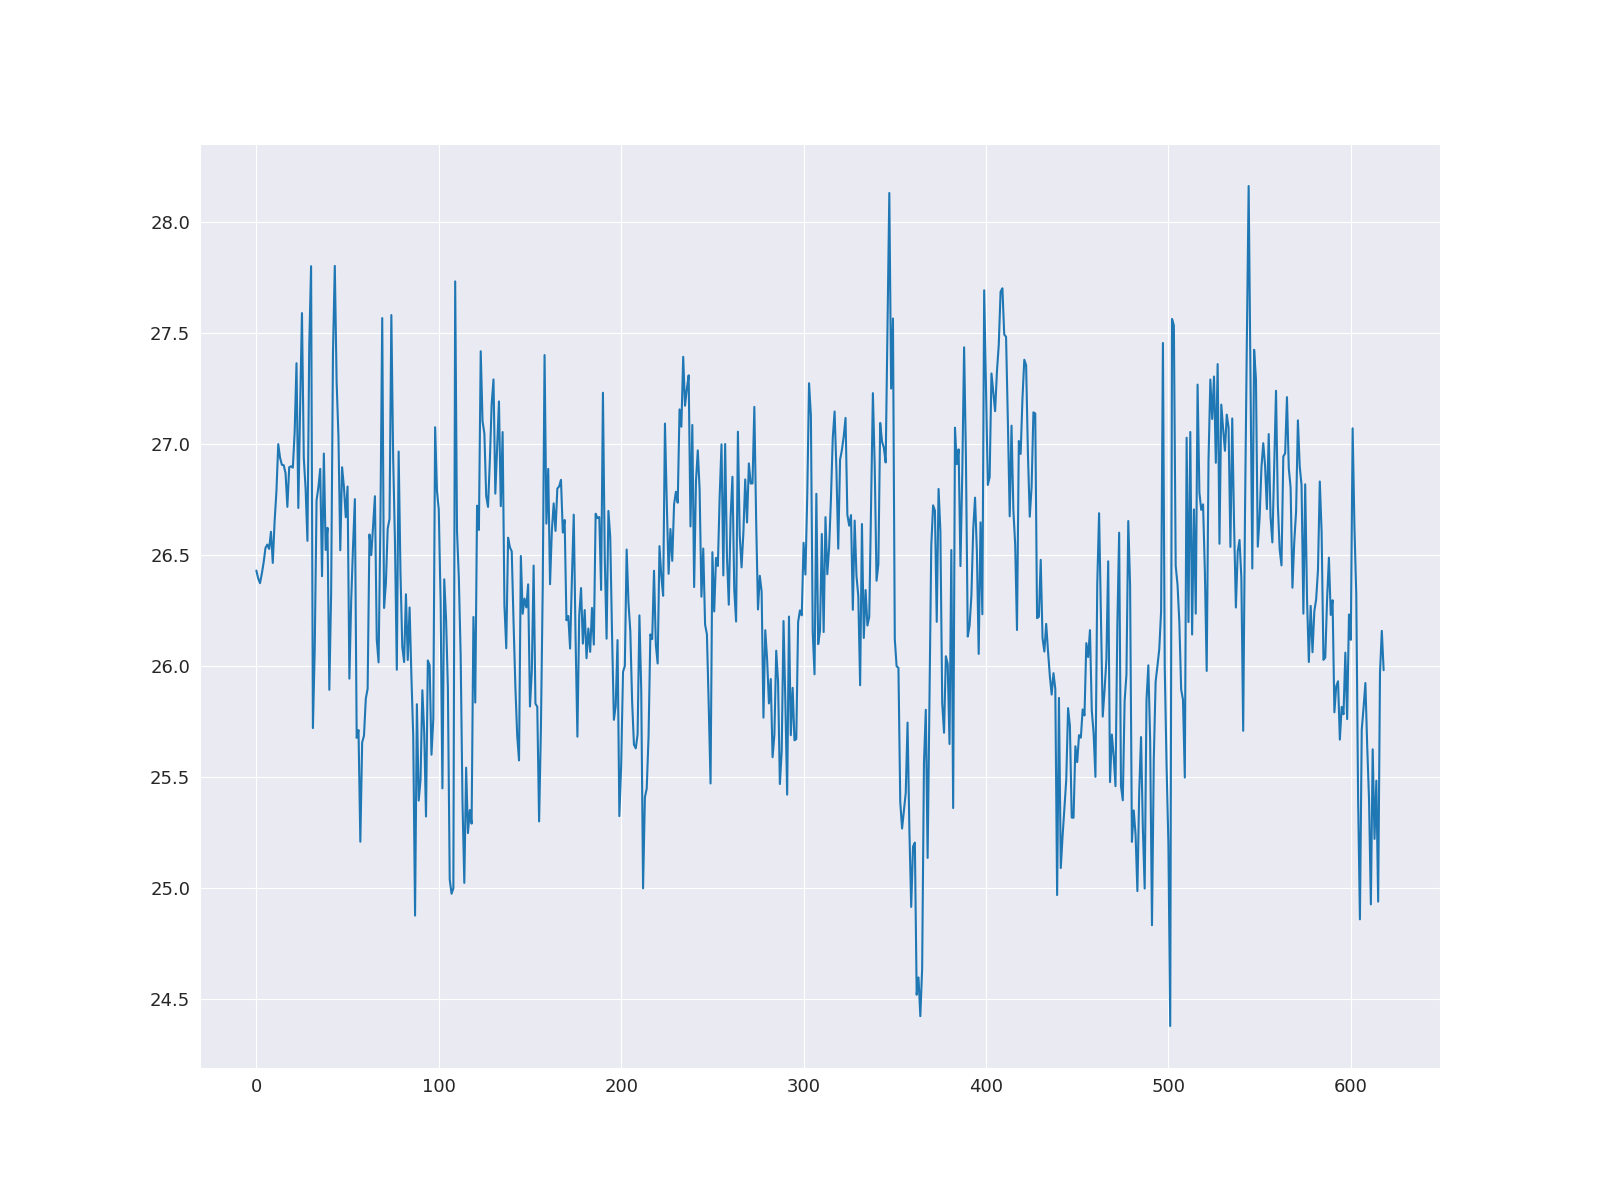

In [12]:
plt.figure()
plt.plot(values)